# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",1)

In [ ]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.drop(['ID','ZIP Code'],axis = 1,inplace = True)

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
import plotly.express as ps

In [ ]:
fig = ps.box(df , y = ['Age','Experience','Income','Family','Education'])
fig.show()

In [ ]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

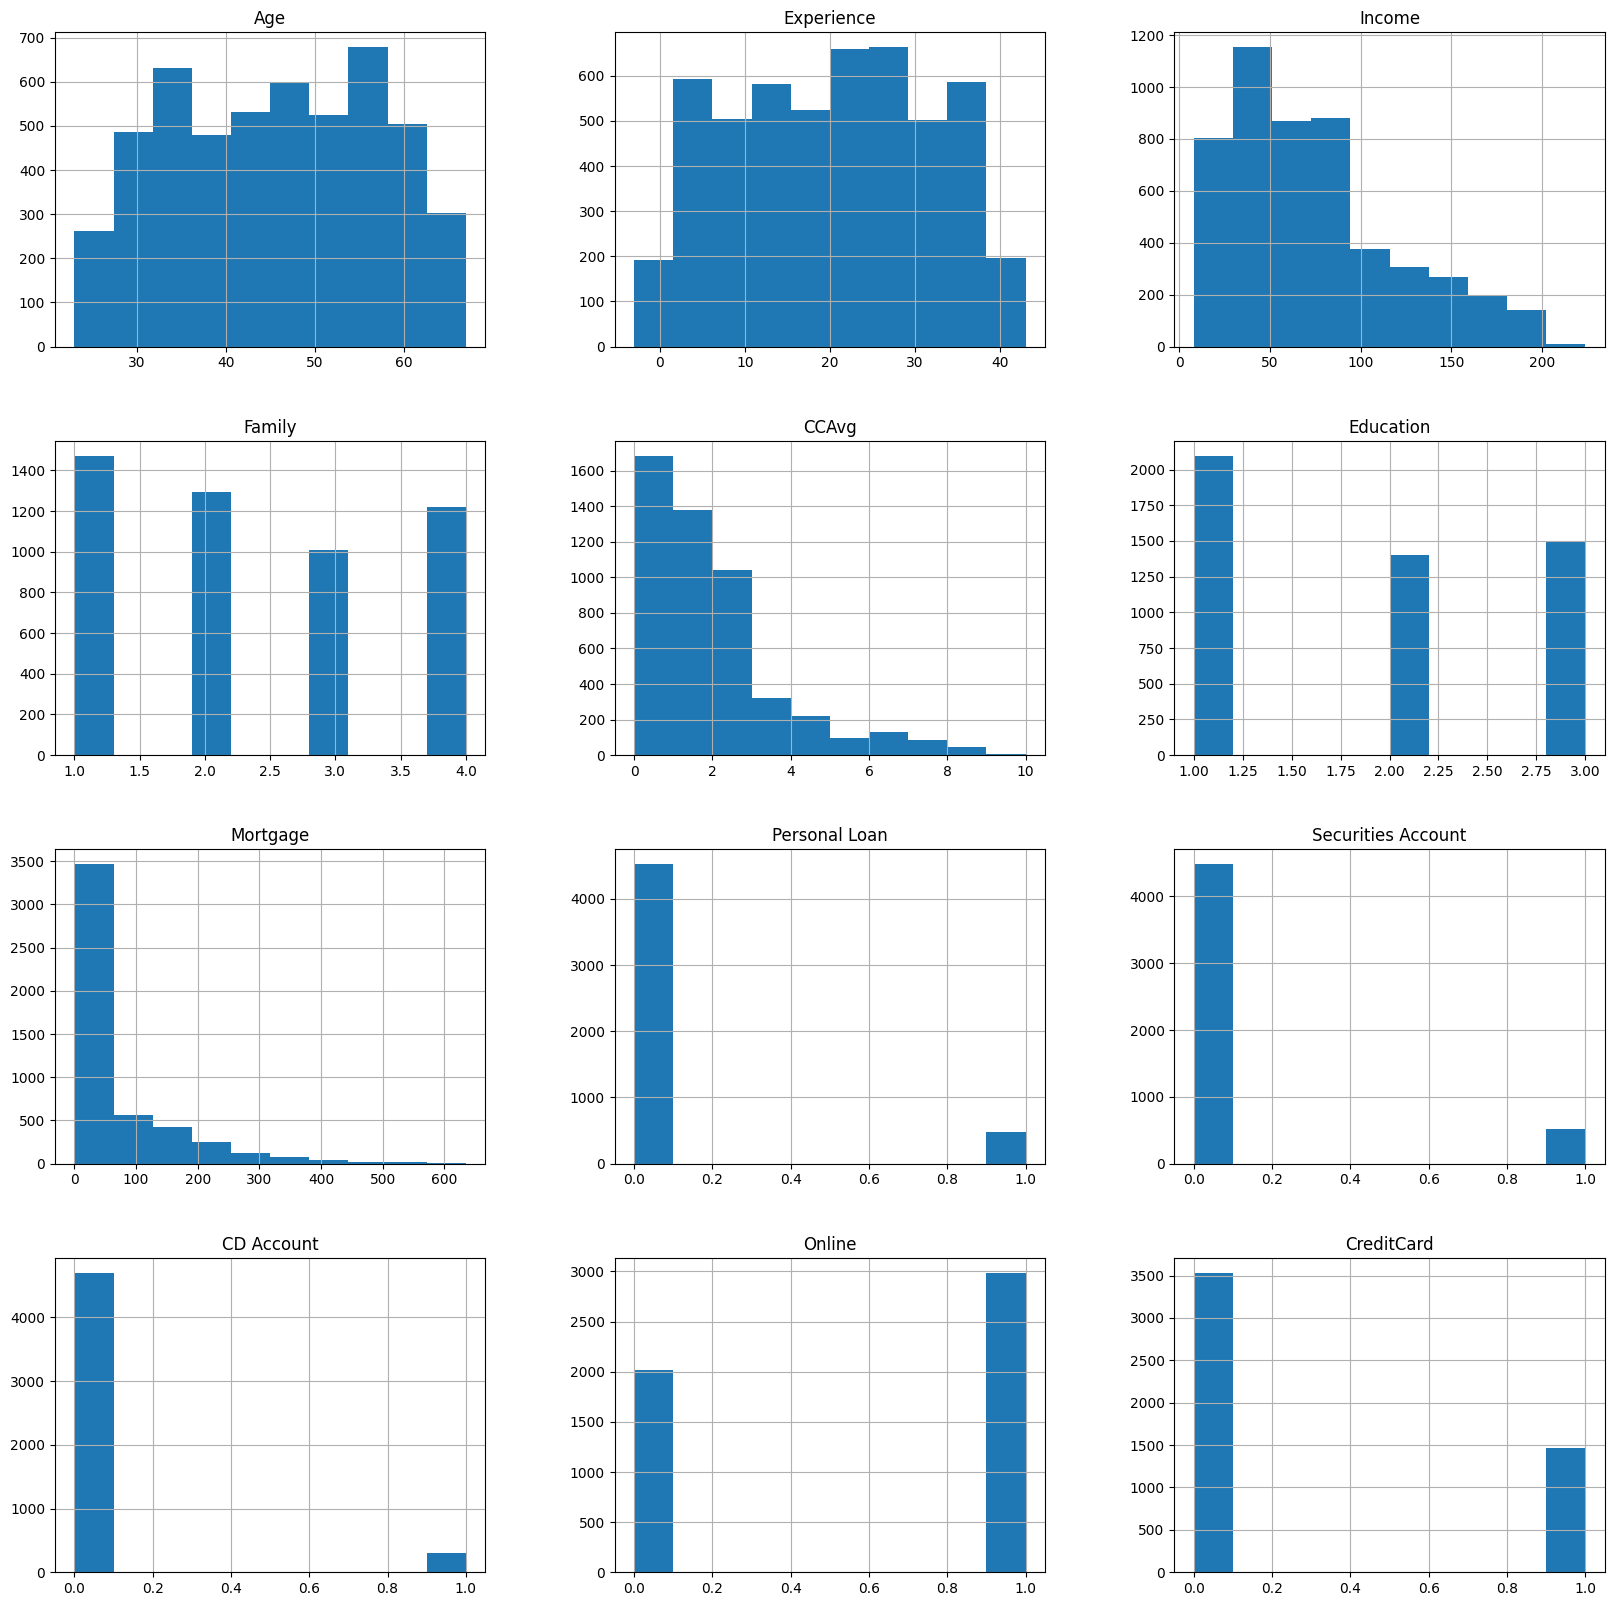

In [ ]:
df.hist(figsize = (20,20))

<Axes: xlabel='Experience', ylabel='Density'>

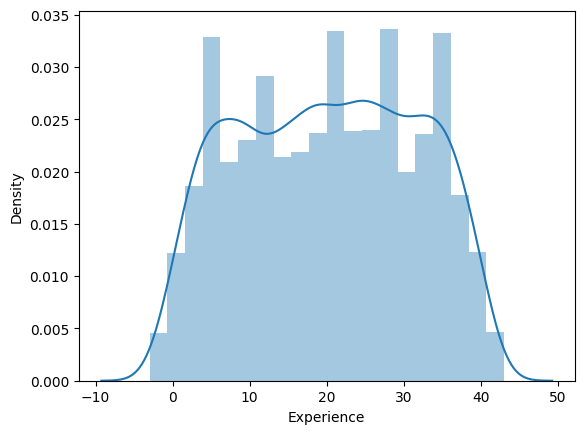

In [ ]:
sns.distplot(df['Experience'])

In [ ]:
df['Experience'].mean()

20.1046

In [ ]:
negative_exp = df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [ ]:
negative_exp.shape

(52, 12)

<Axes: xlabel='Age', ylabel='Density'>

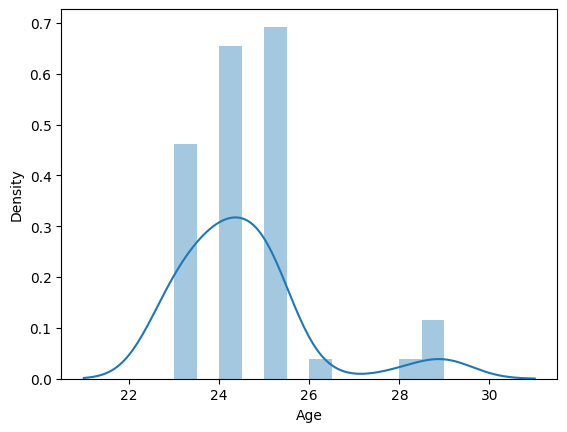

In [ ]:
sns.distplot(negative_exp['Age'])

In [ ]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [ ]:
negative_exp.size

624

In [ ]:
print('There are {} records which has negative values for experience, approx {} %'.format(negative_exp.size ,
                                ((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [ ]:
data = df.copy()

In [ ]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.shape

(5000, 12)

In [ ]:
data['Experience'] = np.where(data['Experience']<0,
                              data['Experience'].mean(),
                              data['Experience'])

In [ ]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [ ]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

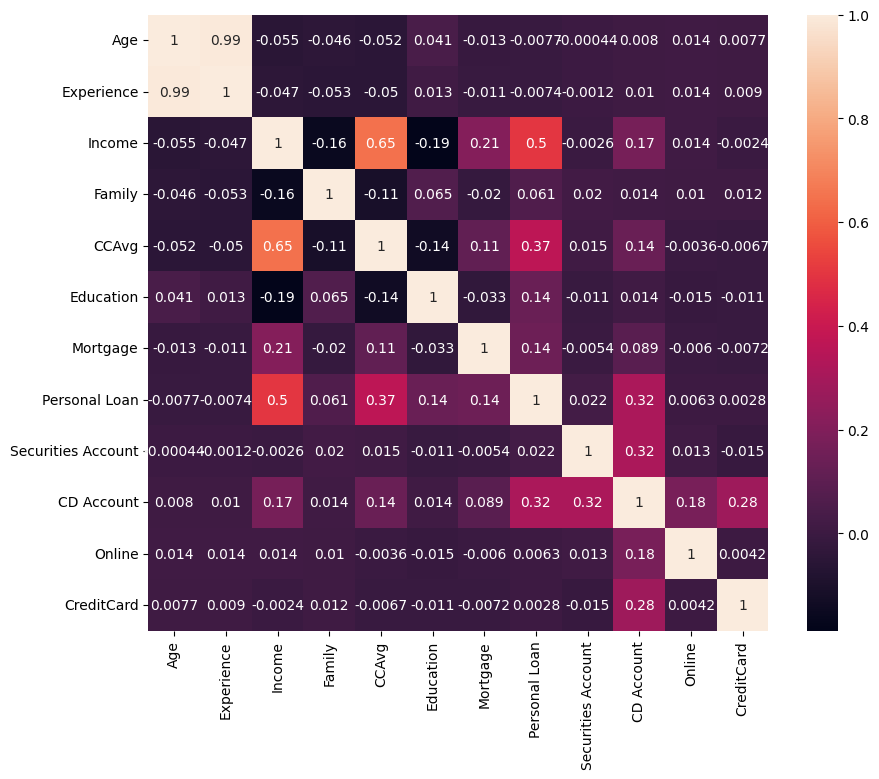

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True)

In [ ]:
data = data.drop(['Experience'],axis = 1)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Education
data['Education'].unique()

array([1, 2, 3])

In [ ]:
def experience(x):
    if x == 1:
        return "UnderGraduate"
    if x == 2:
        return "Graduate"
    if x == 3:
        return "Professional Person"

In [ ]:
data['EDU'] = data['Education'].apply(experience)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,UnderGraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,UnderGraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,UnderGraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [ ]:
data['EDU'].unique()

array(['UnderGraduate', 'Graduate', 'Professional Person'], dtype=object)

In [ ]:
education_dis = data.groupby('EDU')['Age'].count()

In [ ]:
education_dis

EDU
Graduate               1403
Professional Person    1501
UnderGraduate          2096
Name: Age, dtype: int64

In [ ]:
fig = ps.pie(data, values =education_dis,names = education_dis.index, title = 'Pie Chart')
fig.show()

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU'],
      dtype='object')

In [ ]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [ ]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Depostie"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securites & Depsotie account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Scurites account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposite account"


In [ ]:
data['Account_holder_category'] = data.apply(security, axis = 1)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,UnderGraduate,Holds only Scurites account
1,45,34,3,1.5,1,0,0,1,0,0,0,UnderGraduate,Holds only Scurites account
2,39,11,1,1.0,1,0,0,0,0,0,0,UnderGraduate,Does not hold Securites & Depsotie account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not hold Securites & Depsotie account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not hold Securites & Depsotie account


In [ ]:
values = data['Account_holder_category'].value_counts()
values.index

Index(['Does not hold Securites & Depsotie account',
       'Holds only Scurites account', 'Holds only Deposite account',
       'Holds Securities & Depostie'],
      dtype='object')

In [ ]:
fig = ps.pie(data, values =values, names =values.index, title = 'Pie Chart')
fig.show()

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [ ]:
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

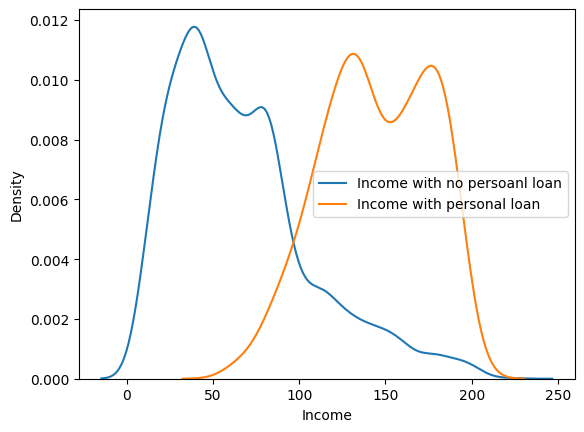

In [ ]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False,
            label = "Income with no persoanl loan")

sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,
            label = "Income with personal loan")
plt.legend()

In [ ]:
def plot(col1, col2, lable1, lable2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False,
            label =lable1)

    sns.distplot(data[data[col2] == 1][col1], hist = False,
            label = lable2)

    plt.legend()
    plt.title(title)

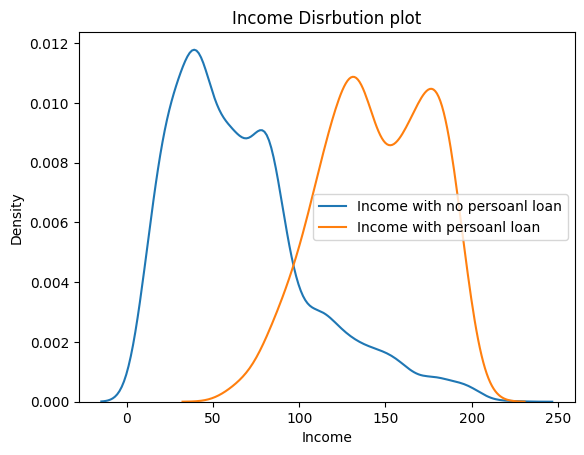

In [ ]:
plot('Income', 'Personal Loan', "Income with no persoanl loan", "Income with persoanl loan", "Income Disrbution plot")

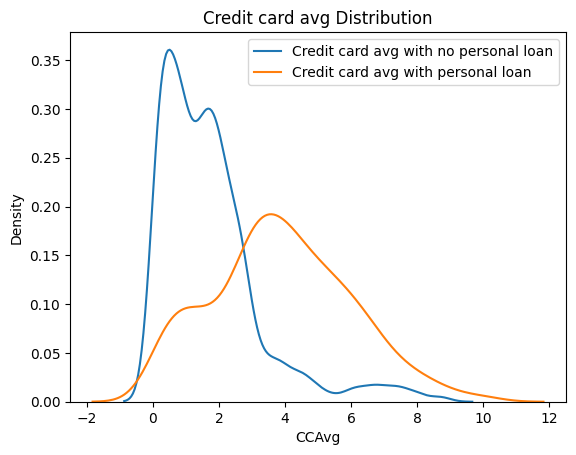

In [ ]:
plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [ ]:
col = ['Securities Account',
      'Online',
      'Account_holder_category',
      'CreditCard']

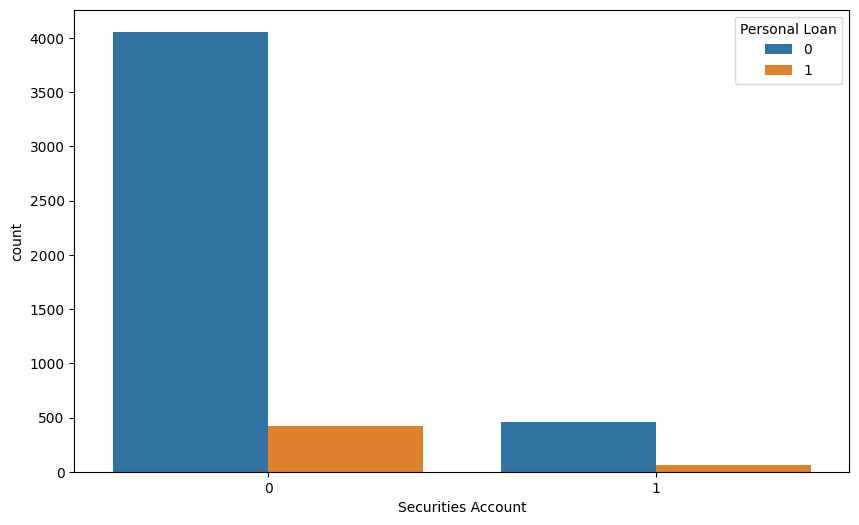

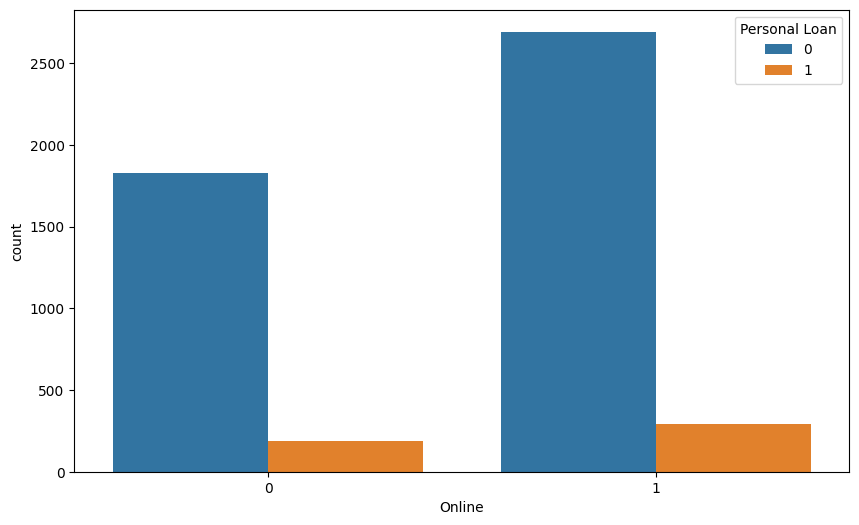

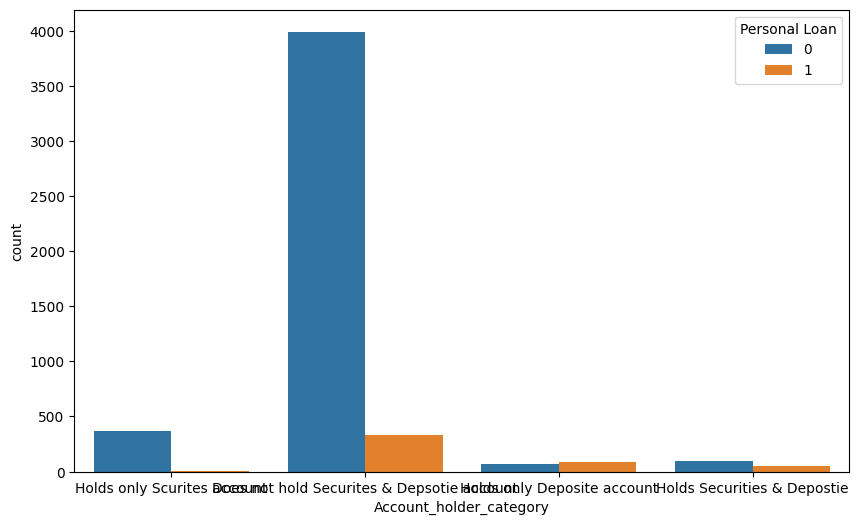

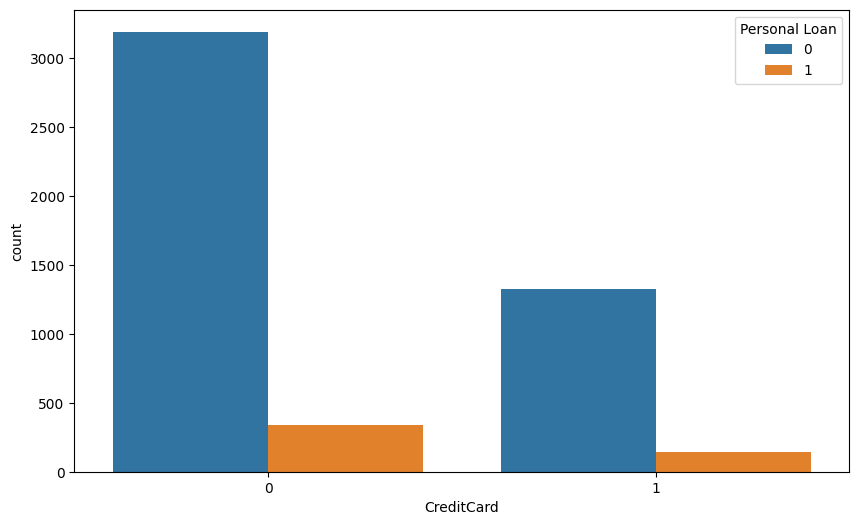

In [ ]:
for i in col:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')

In [ ]:
from scipy.stats import zscore


In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

IQR = q3 - q1
print(IQR)

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


In [ ]:
# Log Normal Transform

data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1 + 1)
data_1

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465
